# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The tmdb movie dataset was gotten from <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">kaggle</a> which was gotten from The movie database TMDb, the file contains data about 10,000+ movies. The dataset contains 21 columns which are 
1. id: The movie id
2. imdb_id: The id of a movie in the imdb database  
3. popularity: A metric that boosts search results, No of votes, views, favourites are one of the things that contributes to it
4. budget: The amount used to produce the movie in dollars
5. revenue: The amount generated from the movie in dollars
6. original_title: The title of the movie
7. cast: The names of the main actors in he movie	
8. homepage: url to the homepage of the movie
9. director: The name of the director of the movie
10. tagline: 
11. keywords:	
12. overview:	
13. runtime: The duration of the movie in seconds
14. genres:	
15. production_companies: The company that produced the movie
16. release_date: The exact day the movie was released	
17. vote_count:	The number of votes for each movie
18. vote_average: The average rating out of 10 given to each movie
19. release_year: The year the movie was released	
20. budget_adj: The amount used to produce the movie in terms of 2010 dollars accounting for inflation
21. revenue_adj: The amount generated from the movie in terms of 2010 dollars accounting for inflation


### Question(s) for Analysis

1. Does high budget equate to a high revenue?
2. Does the presence of homepage affecyts the popularity, vote_count or vote_average?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing the packages that will be used

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('tmdb_movies.csv')
df.head(1)

# I loaded the movie dataset and also viewed it 

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [3]:
df.info()
# A concise report on the dataset, to get the data types of each columns and also any columns with a missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
sum(df.duplicated())

1

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09


### Data Cleaning


In [8]:
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [9]:
#dropping columns that might not be useful for my analysis
c = ['imdb_id', 'id', 'tagline', 'keywords', 'overview','cast', 'release_date', 'genres', 'budget_adj', 'revenue_adj']
df.drop(c, axis = 1, inplace = True)
df.head(1)

popularity     budget     revenue  original_title  \
0   32.985763  150000000  1513528810  Jurassic World   

                        homepage         director  runtime  \
0  http://www.jurassicworld.com/  Colin Trevorrow      124   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   

   vote_average  release_year  
0           6.5          2015

In [10]:
# I will like to drop the homepage column 
# but I want to check if the presence homepage has any effect on the vote_count or vote_average and popularity
df_a = df.query('homepage.notnull()', engine = 'python')
# movies with homepage

df_b = df.query('homepage.isnull()', engine = 'python')
# movies without homepage

In [11]:
df_a['vote_count'].mean(), df_b['vote_count'].mean()

(457.4952316076294, 128.49319041614123)

In [12]:
df_a['vote_average'].mean(), df_b['vote_average'].mean()

(6.158991825613081, 5.90677175283732)

In [13]:
df_a['popularity'].mean(), df_b['popularity'].mean()

(0.9997055132833804, 0.5156484233291273)

In [14]:
df_a.describe()

popularity        budget       revenue      runtime   vote_count  \
count  2936.000000  2.936000e+03  2.936000e+03  2936.000000  2936.000000   
mean      0.999706  2.477644e+07  8.074679e+07   102.582425   457.495232   
std       1.623969  4.496026e+07  1.900219e+08    34.857158   944.752631   
min       0.000620  0.000000e+00  0.000000e+00     0.000000    10.000000   
25%       0.236623  0.000000e+00  0.000000e+00    90.000000    22.000000   
50%       0.502230  2.951330e+06  8.735265e+05   100.000000    81.000000   
75%       1.138305  3.000000e+07  6.870492e+07   113.000000   400.000000   
max      32.985763  4.250000e+08  2.781506e+09   900.000000  9767.000000   

       vote_average  release_year  
count   2936.000000   2936.000000  
mean       6.158992   2008.514305  
std        0.942822      6.750643  
min        2.100000   1961.000000  
25%        5.600000   2007.000000  
50%        6.200000   2010.000000  
75%        6.800000   2012.000000  
max        9.200000   2015.000000

In [15]:
df_b.describe()

popularity        budget       revenue      runtime   vote_count  \
count  7930.000000  7.930000e+03  7.930000e+03  7930.000000  7930.000000   
mean      0.515648  1.086750e+07  2.467183e+07   101.881463   128.493190   
std       0.575551  2.255996e+07  6.740459e+07    29.992706   307.224465   
min       0.000065  0.000000e+00  0.000000e+00     0.000000    10.000000   
25%       0.200833  0.000000e+00  0.000000e+00    90.000000    16.000000   
50%       0.354689  0.000000e+00  0.000000e+00    98.000000    32.000000   
75%       0.617663  1.200000e+07  1.555300e+07   111.000000    98.000000   
max       8.411577  2.250000e+08  1.106280e+09   877.000000  5754.000000   

       vote_average  release_year  
count   7930.000000   7930.000000  
mean       5.906772   1998.660025  
std        0.923077     13.485237  
min        1.500000   1960.000000  
25%        5.300000   1991.000000  
50%        6.000000   2002.000000  
75%        6.500000   2010.000000  
max        8.800000   2015.000000

In [16]:
#There is no much difference in the vote_average but there are significant differences between the vote_count and popularity, 
# therefore, i'll create a column for the homepage
df_a.shape

(2936, 11)

In [17]:
df_b.shape

(7930, 11)

In [18]:
# create array for homepage dataframe
homepage = np.array('Yes')
np.repeat(homepage, 2936)

# create array for no homepage dataframe
no_homepage = np.array('No')
np.repeat(no_homepage, 7930)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [19]:
# I'll add arrays to the homepage and no homepage dataframes by setting a new column called homepage_a.
df_a['homepage_a'] = homepage
df_a.head()

<ipython-input-19-0f80af2fb645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['homepage_a'] = homepage


popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

   runtime                               production_companies  vote_count  \
0      124  Universal Studios|Amblin Entertainment|Legenda...        5562   
1      120  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2      119  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3      136          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4      137  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year homepage_a  
0           6.5          2015        Yes  
1           7.1          2015        Yes  
2           6.3          2015        Yes  
3           7.5          2015        Yes  
4           7.3          2015        Yes

In [20]:
df_b['homepage_a'] = no_homepage
df_b.head()

<ipython-input-20-f11814817d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['homepage_a'] = no_homepage


popularity    budget    revenue   original_title homepage  \
18    5.556818  95000000  542351353       Cinderella      NaN   
21    5.337064  30000000   91709827         Southpaw      NaN   
26    4.564549  68000000  215863606            Ted 2      NaN   
32    3.877764  29000000  287506194  Pitch Perfect 2      NaN   
33    3.648210  40000000  162610473  Bridge of Spies      NaN   

            director  runtime  \
18   Kenneth Branagh      112   
21     Antoine Fuqua      123   
26   Seth MacFarlane      115   
32   Elizabeth Banks      115   
33  Steven Spielberg      141   

                                 production_companies  vote_count  \
18  Walt Disney Pictures|Genre Films|Beagle Pug Fi...        1495   
21            Escape Artists|Riche-Ludwig Productions        1386   
26  Universal Pictures|Media Rights Capital|Fuzzy ...        1666   
32  Universal Pictures|Gold Circle Films|Brownston...        1264   
33  DreamWorks SKG|Amblin Entertainment|Studio Bab...        1638   

    vote_average  release_year homepage_a  
18           6.8          2015         No  
21           7.3          2015         No  
26           6.3          2015         No  
32           6.8          2015         No  
33           7.1          2015         No

In [21]:
# appending the 2 dataframes
df = df_a.append(df_b, ignore_index = True)

# viewing dataframe to check for success
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

   runtime                               production_companies  vote_count  \
0      124  Universal Studios|Amblin Entertainment|Legenda...        5562   
1      120  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2      119  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3      136          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4      137  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year homepage_a  
0           6.5          2015        Yes  
1           7.1          2015        Yes  
2           6.3          2015        Yes  
3           7.5          2015        Yes  
4           7.3          2015        Yes

In [22]:
#dropping the initial homepage column
df.drop(['homepage'], axis=1, inplace = True)
df.head(1)

popularity     budget     revenue  original_title         director  \
0   32.985763  150000000  1513528810  Jurassic World  Colin Trevorrow   

   runtime                               production_companies  vote_count  \
0      124  Universal Studios|Amblin Entertainment|Legenda...        5562   

   vote_average  release_year homepage_a  
0           6.5          2015        Yes

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  homepage_a            10866 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [24]:
#I also decided to drop the rows that has duplicate original title
sum(df['original_title'].duplicated())
# checking for duplicated titles

295

In [25]:
df = df.drop_duplicates(subset = 'original_title', keep='first')
# dropping the movie titles with duplicates

In [26]:
sum(df['original_title'].duplicated())
# rechecking for duplicates

0

In [27]:
df.isna().sum()
# checking for missing value counts

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  43
runtime                    0
production_companies    1021
vote_count                 0
vote_average               0
release_year               0
homepage_a                 0
dtype: int64

In [28]:
# dropping rows with missing values
df.dropna(inplace=True)

In [29]:
df.isna().sum()
# confirming for null values

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
production_companies    0
vote_count              0
vote_average            0
release_year            0
homepage_a              0
dtype: int64

In [30]:
#checking for duplicates
sum(df.duplicated())

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9530 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9530 non-null   float64
 1   budget                9530 non-null   int64  
 2   revenue               9530 non-null   int64  
 3   original_title        9530 non-null   object 
 4   director              9530 non-null   object 
 5   runtime               9530 non-null   int64  
 6   production_companies  9530 non-null   object 
 7   vote_count            9530 non-null   int64  
 8   vote_average          9530 non-null   float64
 9   release_year          9530 non-null   int64  
 10  homepage_a            9530 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 893.4+ KB


In [32]:
#Now I have a clean dataset with no null values or duplicates, i'll save the cleaned dataset in a new file
df.to_csv('df_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
1. Does high budget equate to a high revenue?


In [33]:
df = pd.read_csv('df_clean.csv')

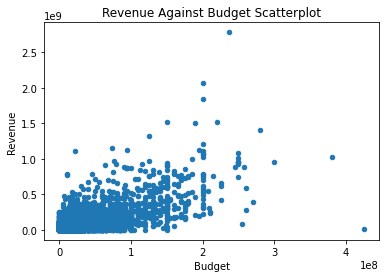

In [34]:
df.plot.scatter(x = 'budget', y='revenue')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Revenue Against Budget Scatterplot");
#plotting a scatter plot for budget and revenue

### Since high budget doesn't equate to high revenue then: What kinds of properties are associated with movies that have high revenues?

#### scatterplot of revenue against various features

In [35]:
#defining a function toplot scatter plot
def df_scatter(x, y):
    df.plot.scatter(x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x+" " +y+" "+ "Scatterplot")

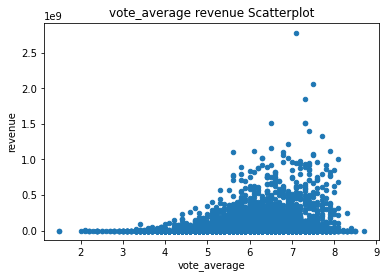

In [36]:
df_scatter("vote_average", "revenue")

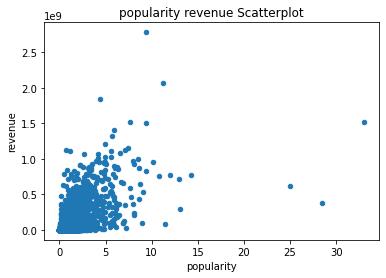

In [37]:
df_scatter("popularity", "revenue")

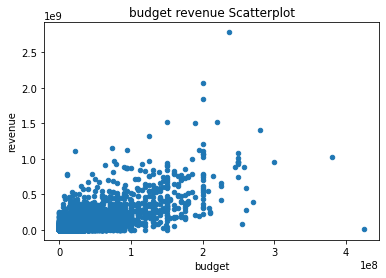

In [38]:
df_scatter("budget", "revenue")

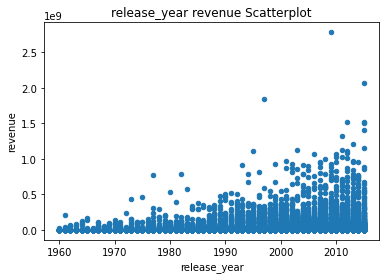

In [39]:
df_scatter('release_year', 'revenue');

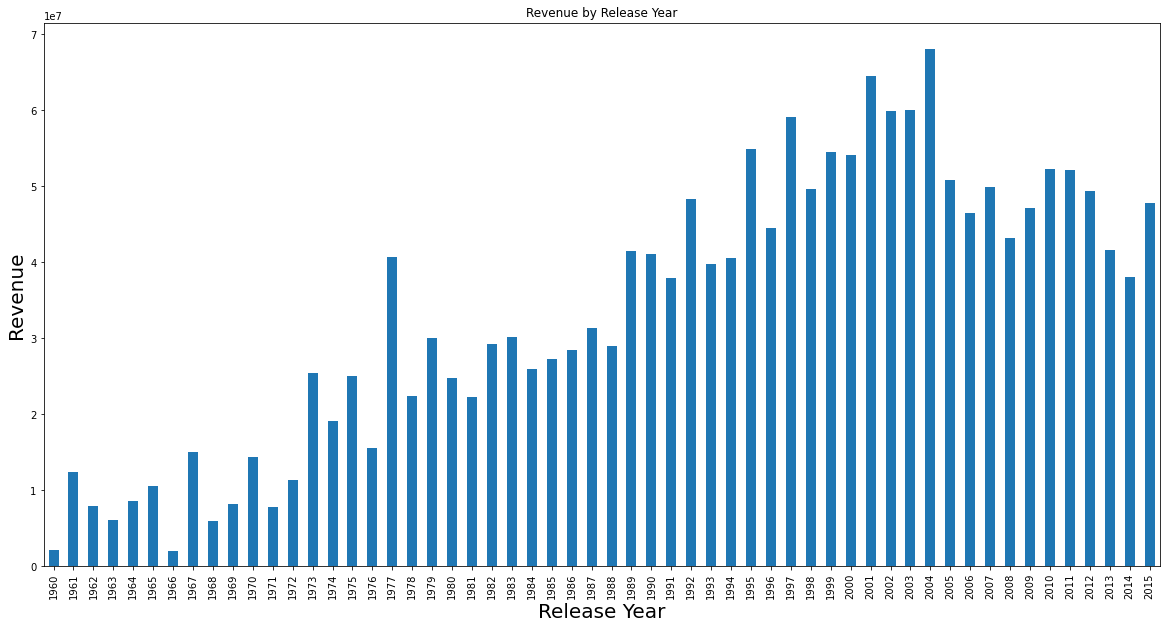

In [40]:
revenue_means = df.groupby("release_year")["revenue"].mean()
revenue_means.plot(kind = 'bar', title = 'Revenue by Release Year', alpha = 1.0, figsize = (20,10), label ="Revenue")
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Revenue", fontsize=20);

In [41]:
#I'll group the revenue into levels by the percentil
# Viewing the min, 25%, 50%, 75%, max revenues values with Pandas describe
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  9530.000000  9.530000e+03  9.530000e+03  9530.000000  9530.000000   
mean      0.695105  1.628691e+07  4.441795e+07   102.541658   240.400944   
std       1.043831  3.241307e+07  1.229899e+08    27.103069   606.733769   
min       0.000188  0.000000e+00  0.000000e+00     0.000000    10.000000   
25%       0.230965  0.000000e+00  0.000000e+00    90.000000    18.000000   
50%       0.419354  1.350000e+05  0.000000e+00    99.000000    46.000000   
75%       0.776361  2.000000e+07  3.084908e+07   112.000000   174.000000   
max      32.985763  4.250000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year  
count   9530.000000   9530.000000  
mean       5.961154   2001.227072  
std        0.917484     12.810888  
min        1.500000   1960.000000  
25%        5.400000   1994.000000  
50%        6.000000   2005.000000  
75%        6.600000   2011.000000  
max        8.700000   2015.000000

In [42]:
#looking at the descriptive features, seems we have some zero values on the budget and revenue columns, 
# i'll fill the missing values with the mean
df.budget
#checking the budget column

0       150000000
1       150000000
2       110000000
3       200000000
4       190000000
          ...    
9525            0
9526            0
9527            0
9528            0
9529        19000
Name: budget, Length: 9530, dtype: int64

In [43]:
df.revenue
# checking the revenue column

0       1513528810
1        378436354
2        295238201
3       2068178225
4       1506249360
           ...    
9525             0
9526             0
9527             0
9528             0
9529             0
Name: revenue, Length: 9530, dtype: int64

In [44]:
df["budget"].mean()

16286909.469674712

In [45]:
df.revenue.mean()

44417945.014795385

In [46]:
df = df.mask(df==0).fillna(df.mean())
# filling the zero values

In [47]:
df.describe()
#checking for success

popularity        budget       revenue      runtime   vote_count  \
count  9530.000000  9.530000e+03  9.530000e+03  9530.000000  9530.000000   
mean      0.695105  2.421674e+07  6.724681e+07   102.681536   240.400944   
std       1.043831  2.930106e+07  1.165812e+08    26.836764   606.733769   
min       0.000188  1.000000e+00  2.000000e+00     2.000000    10.000000   
25%       0.230965  1.628691e+07  3.520189e+07    90.000000    18.000000   
50%       0.419354  1.628691e+07  4.441795e+07   100.000000    46.000000   
75%       0.776361  2.000000e+07  4.441795e+07   112.000000   174.000000   
max      32.985763  4.250000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year  
count   9530.000000   9530.000000  
mean       5.961154   2001.227072  
std        0.917484     12.810888  
min        1.500000   1960.000000  
25%        5.400000   1994.000000  
50%        6.000000   2005.000000  
75%        6.600000   2011.000000  
max        8.700000   2015.000000

In [48]:
# There are no zero values, I'll cut the data into groups, using the minimum, 25%, 75% and maximum values
bin_edges = [2.000000e+00, 3.520189e+07, 4.441795e+07, 2.781506e+09]

In [49]:
# labels for the revenue groups
bin_names = ['Low Revenue', 'Medium Revenue', 'High Revenue']

In [50]:
# Creating revenue_levels column
df['revenue_levels'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)

# Checking for successful creation of this column
df.head()

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1.506249e+09                     Furious 7   

           director  runtime  \
0   Colin Trevorrow    124.0   
1     George Miller    120.0   
2  Robert Schwentke    119.0   
3       J.J. Abrams    136.0   
4         James Wan    137.0   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year homepage_a revenue_levels  
0           6.5          2015        Yes   High Revenue  
1           7.1          2015        Yes   High Revenue  
2           6.3          2015        Yes   High Revenue  
3           7.5          2015        Yes   High Revenue  
4           7.3          2015        Yes   High Revenue

In [51]:
# Finding the mean budget of each revenue level with groupby
df.groupby('revenue_levels')['budget'].mean()

revenue_levels
Low Revenue       1.644974e+07
Medium Revenue    1.579459e+07
High Revenue      5.539356e+07
Name: budget, dtype: float64

In [52]:
# Finding the mean popularity of each revenue level with groupby
df.groupby('revenue_levels')['popularity'].mean()

revenue_levels
Low Revenue       0.573010
Medium Revenue    0.371910
High Revenue      1.680239
Name: popularity, dtype: float64

In [53]:
# Finding the mean vote average of each revenue level with groupby
df.groupby('revenue_levels')['vote_average'].mean()

revenue_levels
Low Revenue       6.032549
Medium Revenue    5.802345
High Revenue      6.287123
Name: vote_average, dtype: float64

In [54]:
df.head(3)

popularity       budget       revenue      original_title  \
0   32.985763  150000000.0  1.513529e+09      Jurassic World   
1   28.419936  150000000.0  3.784364e+08  Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08           Insurgent   

           director  runtime  \
0   Colin Trevorrow    124.0   
1     George Miller    120.0   
2  Robert Schwentke    119.0   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year homepage_a revenue_levels  
0           6.5          2015        Yes   High Revenue  
1           7.1          2015        Yes   High Revenue  
2           6.3          2015        Yes   High Revenue

In [55]:
df2 = df.groupby('release_year')['revenue'].sum().reset_index()
df2

release_year       revenue
0           1960  9.413639e+08
1           1961  1.135243e+09
2           1962  1.015103e+09
3           1963  1.198140e+09
4           1964  1.762356e+09
5           1965  1.634480e+09
6           1966  1.683783e+09
7           1967  1.414023e+09
8           1968  1.219555e+09
9           1969  1.295738e+09
10          1970  1.715089e+09
11          1971  2.077419e+09
12          1972  1.372948e+09
13          1973  2.568881e+09
14          1974  1.809029e+09
15          1975  1.949103e+09
16          1976  1.941789e+09
17          1977  3.488122e+09
18          1978  2.738597e+09
19          1979  2.761806e+09
20          1980  2.984469e+09
21          1981  3.137230e+09
22          1982  3.928850e+09
23          1983  3.407302e+09
24          1984  4.341182e+09
25          1985  4.533648e+09
26          1986  4.407857e+09
27          1987  5.118657e+09
28          1988  6.001167e+09
29          1989  7.321738e+09
30          1990  6.885465e+09
31          1991  7.021112e+09
32          1992  7.713572e+09
33          1993  9.358907e+09
34          1994  1.084343e+10
35          1995  1.201474e+10
36          1996  1.213814e+10
37          1997  1.359949e+10
38          1998  1.252733e+10
39          1999  1.525294e+10
40          2000  1.440100e+10
41          2001  1.707997e+10
42          2002  1.868411e+10
43          2003  2.027004e+10
44          2004  2.069960e+10
45          2005  2.235191e+10
46          2006  2.268686e+10
47          2007  2.793039e+10
48          2008  2.977567e+10
49          2009  3.438721e+10
50          2010  3.114554e+10
51          2011  3.354571e+10
52          2012  3.751493e+10
53          2013  3.802093e+10
54          2014  4.193550e+10
55          2015  4.217295e+10

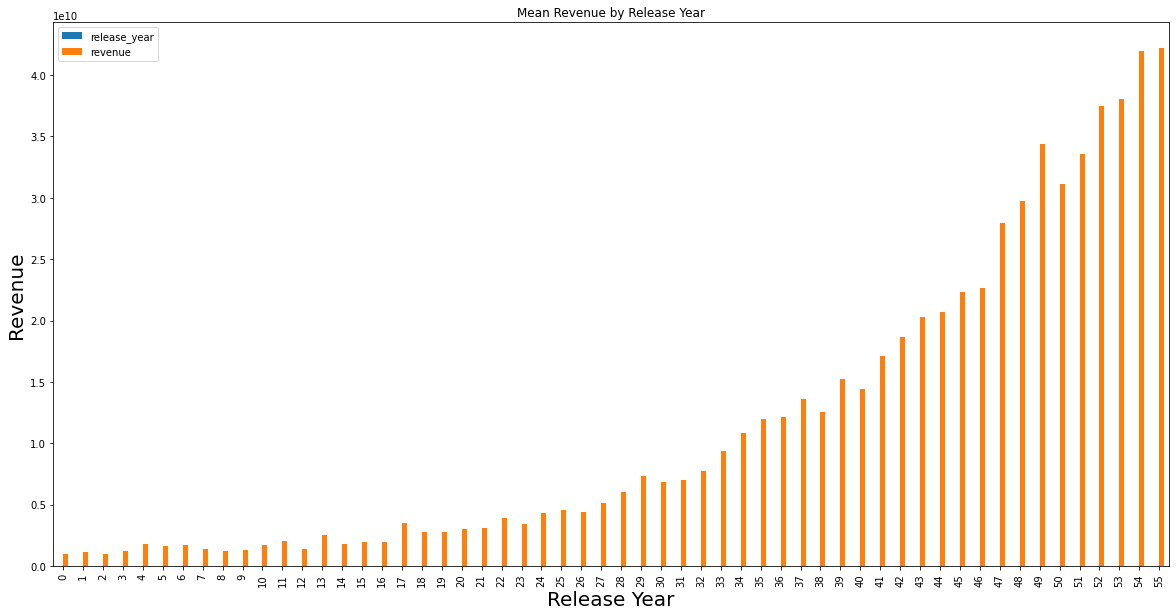

In [56]:
df2.plot(kind='bar', title = 'Mean Revenue by Release Year', figsize = (20,10), label="Mean Revenue")
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Revenue", fontsize=20);

In [57]:
df3 = df.groupby('release_year')['revenue', 'budget'].sum().reset_index()
#getting the mean of the budget and revenue across each year
df3

<ipython-input-57-3e094daee2e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby('release_year')['revenue', 'budget'].sum().reset_index()


release_year       revenue        budget
0           1960  9.413639e+08  3.340382e+08
1           1961  1.135243e+09  2.902406e+08
2           1962  1.015103e+09  2.948258e+08
3           1963  1.198140e+09  3.664959e+08
4           1964  1.762356e+09  5.118035e+08
5           1965  1.634480e+09  4.308040e+08
6           1966  1.683783e+09  5.447843e+08
7           1967  1.414023e+09  3.588696e+08
8           1968  1.219555e+09  4.006641e+08
9           1969  1.295738e+09  3.352935e+08
10          1970  1.715089e+09  5.178528e+08
11          1971  2.077419e+09  5.674412e+08
12          1972  1.372948e+09  3.047145e+08
13          1973  2.568881e+09  5.705969e+08
14          1974  1.809029e+09  3.799213e+08
15          1975  1.949103e+09  4.308779e+08
16          1976  1.941789e+09  5.495835e+08
17          1977  3.488122e+09  6.010966e+08
18          1978  2.738597e+09  7.099412e+08
19          1979  2.761806e+09  7.194213e+08
20          1980  2.984469e+09  9.890764e+08
21          1981  3.137230e+09  8.735996e+08
22          1982  3.928850e+09  1.063719e+09
23          1983  3.407302e+09  1.120623e+09
24          1984  4.341182e+09  1.394462e+09
25          1985  4.533648e+09  1.541853e+09
26          1986  4.407857e+09  1.500057e+09
27          1987  5.118657e+09  1.557949e+09
28          1988  6.001167e+09  1.964010e+09
29          1989  7.321738e+09  2.024297e+09
30          1990  6.885465e+09  2.205442e+09
31          1991  7.021112e+09  2.452021e+09
32          1992  7.713572e+09  2.350253e+09
33          1993  9.358907e+09  3.016868e+09
34          1994  1.084343e+10  3.621029e+09
35          1995  1.201474e+10  3.983903e+09
36          1996  1.213814e+10  4.745098e+09
37          1997  1.359949e+10  5.653662e+09
38          1998  1.252733e+10  5.463965e+09
39          1999  1.525294e+10  6.577737e+09
40          2000  1.440100e+10  6.498267e+09
41          2001  1.707997e+10  6.742686e+09
42          2002  1.868411e+10  6.993019e+09
43          2003  2.027004e+10  7.852122e+09
44          2004  2.069960e+10  8.324756e+09
45          2005  2.235191e+10  9.095287e+09
46          2006  2.268686e+10  9.529487e+09
47          2007  2.793039e+10  1.020049e+10
48          2008  2.977567e+10  1.113946e+10
49          2009  3.438721e+10  1.228464e+10
50          2010  3.114554e+10  1.235650e+10
51          2011  3.354571e+10  1.212032e+10
52          2012  3.751493e+10  1.267154e+10
53          2013  3.802093e+10  1.398984e+10
54          2014  4.193550e+10  1.432269e+10
55          2015  4.217295e+10  1.334551e+10

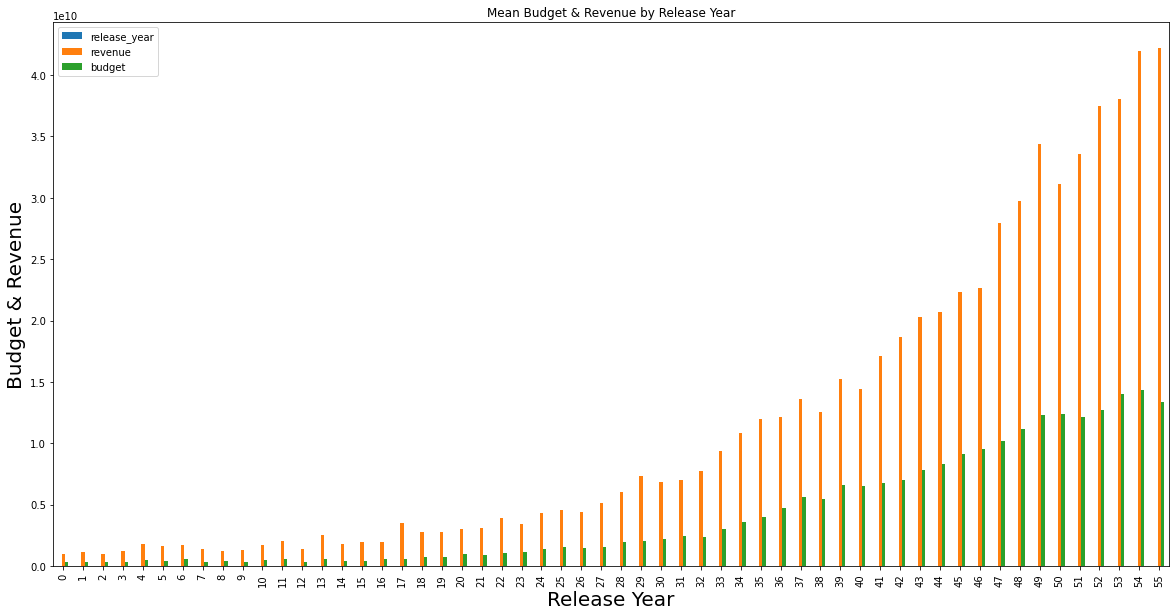

In [58]:
df3.plot(kind='bar', title = 'Mean Budget & Revenue by Release Year', figsize=(20,10))
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Budget & Revenue", fontsize=20);
#plotting the bar chart of the revenue and budget across each year

In [59]:
df["profit"]= df["revenue"] - df["budget"]
df.head(4)

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   

           director  runtime  \
0   Colin Trevorrow    124.0   
1     George Miller    120.0   
2  Robert Schwentke    119.0   
3       J.J. Abrams    136.0   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   

   vote_average  release_year homepage_a revenue_levels        profit  
0           6.5          2015        Yes   High Revenue  1.363529e+09  
1           7.1          2015        Yes   High Revenue  2.284364e+08  
2           6.3          2015        Yes   High Revenue  1.852382e+08  
3           7.5          2015        Yes   High Revenue  1.868178e+09

In [60]:
df["profit"].describe()

count    9.530000e+03
mean     4.303007e+07
std      9.834287e+07
min     -4.139124e+08
25%      1.117641e+07
50%      2.813104e+07
75%      3.441795e+07
max      2.544506e+09
Name: profit, dtype: float64

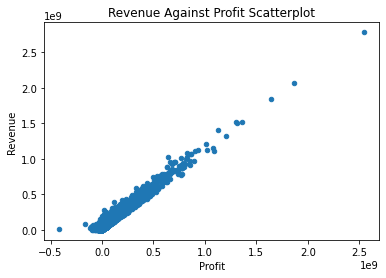

In [61]:
df.plot.scatter(x="profit", y="revenue")
plt.xlabel("Profit")
plt.ylabel("Revenue")
plt.title("Revenue Against Profit Scatterplot");

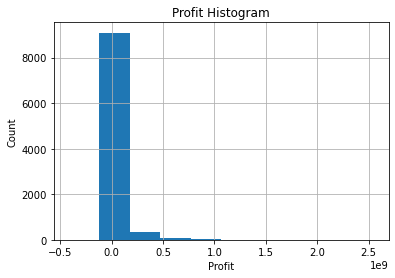

In [62]:
df['profit'].hist()
plt.xlabel("Profit")
plt.ylabel("Count")
plt.title("Profit Histogram");

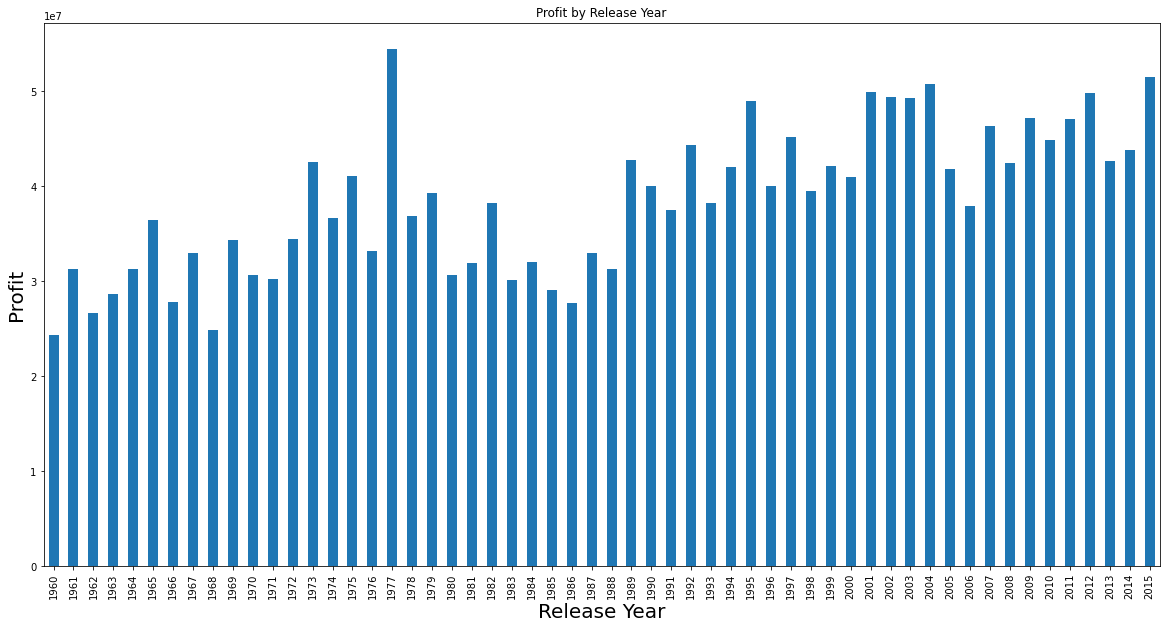

In [63]:
profit_means = df.groupby("release_year")["profit"].mean()
profit_means.plot(kind = 'bar', title = 'Profit by Release Year', alpha = 1.0, figsize = (20,10), label ="Release Year")
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Profit", fontsize=20);

<ipython-input-64-e24f63e0697f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profit_means = df.groupby("release_year")["profit", "revenue"].mean()


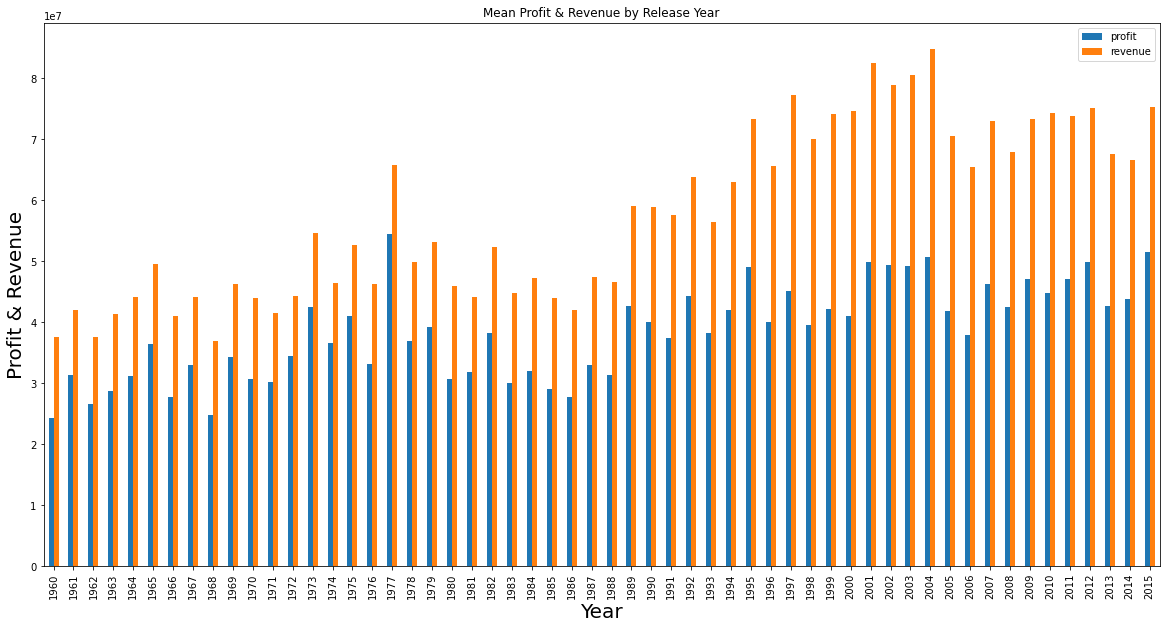

In [64]:
#checking the profit and revenue through the years
profit_means = df.groupby("release_year")["profit", "revenue"].mean()
profit_means.plot(kind = 'bar', title = 'Mean Profit & Revenue by Release Year', alpha = 1.0, figsize = (20,10))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Profit & Revenue", fontsize=20);

### Research Question 
2. Does the presence of Homepage affect the vote_count and popularity

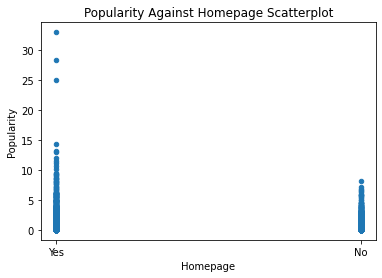

In [65]:
#viewing a scatter plot of the homepage and popularity
df.plot.scatter(x = 'homepage_a', y='popularity')
plt.xlabel("Homepage")
plt.ylabel("Popularity")
plt.title("Popularity Against Homepage Scatterplot");

In [66]:
# Finding the mean popularity with groupby
df.groupby('homepage_a')['popularity'].mean()

homepage_a
No     0.545083
Yes    1.086844
Name: popularity, dtype: float64

Text(0, 0.5, 'Popularity')

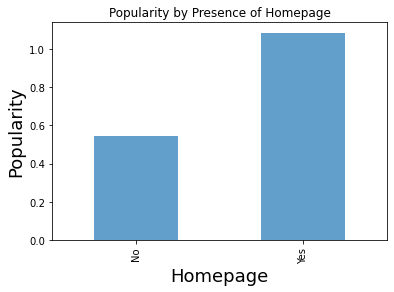

In [67]:
homepage_available_means = df.groupby('homepage_a')['popularity'].mean()
homepage_available_means.plot(kind = 'bar', title = 'Popularity by Presence of Homepage', alpha = .7)
plt.xlabel('Homepage', fontsize=18)
plt.ylabel('Popularity', fontsize=18)

Text(0, 0.5, 'vote_average')

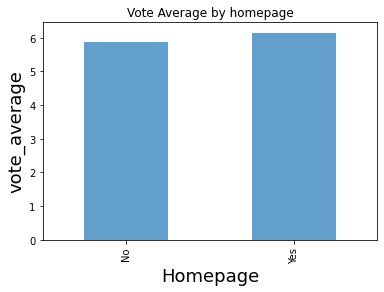

In [68]:
homepage_available_means = df.groupby('homepage_a')['vote_average'].mean()
homepage_available_means.plot(kind = 'bar', title = 'Vote Average by homepage', alpha = .7)
plt.xlabel('Homepage', fontsize=18)
plt.ylabel('vote_average', fontsize=18)

<a id='conclusions'></a>
## Conclusions
> 1. I checked to see if high budget equates to high revenue, I further my analysis by checking the revenue for each year and I found out that the revenue grew along the year, I also checked to see if it is the same trend with the profit.
2. I checked if the presence of homepage affects the popularity, and vote_count of a movie and found out that the presence of homepage affected the popularity and the vote_count but not the vote_average.

### Limitations
There are some limitations i encountered during this analyses.
> 1. The revenue and budget columns had Zero values, I had to fill the zero values with the mean of each columns, which might not be the exact representation of these zero values.
2. A second column for budget and revenue was added named budget_adj and revenue_adj respectively, which was said to be in terms of 2010 dollars; accounting for inflation, I wasn't so sure what to do with this additional columns, so I just dropped them.
3. I wasn't sure if the homepage column that are null meant that the movie doesn't have an homepage or the data wasn't collected.